In [1]:
import seaborn as sns
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import ast
import numpy as np

In [11]:
data = pd.read_csv("../results/experiment2_fairness_final.csv")
data['MSE for different groups'] = data['MSE for different groups'].apply(ast.literal_eval)
data['Experiment'] = (
    data.groupby(['Data', 'Method']).cumcount() + 1
)


In [22]:
first_experiment_df = data[(data['Experiment'] == 2) & (data['Method'] != 'random_selection') & (data['Method'] != 'randomized')]

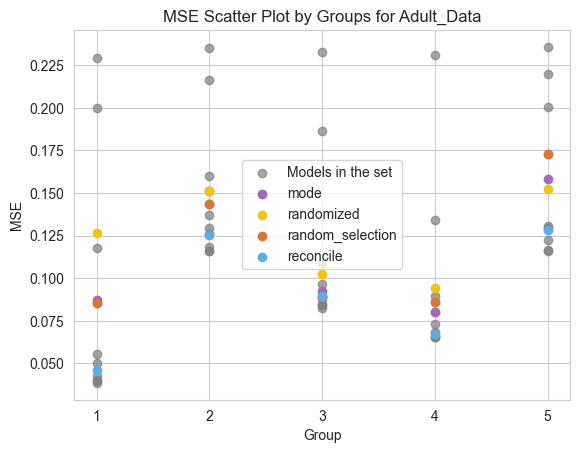

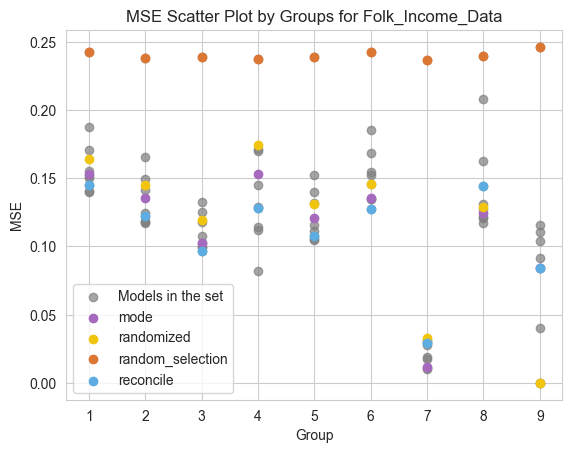

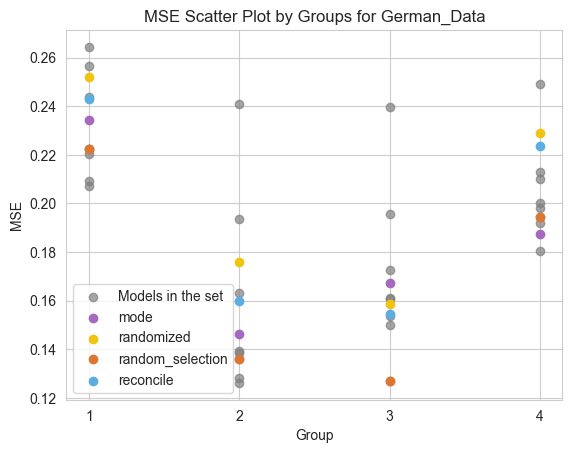

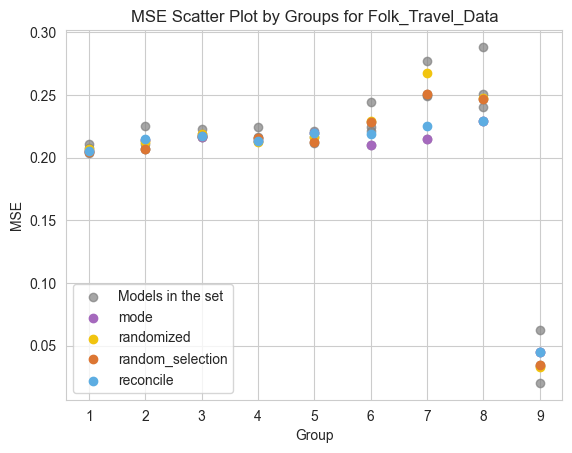

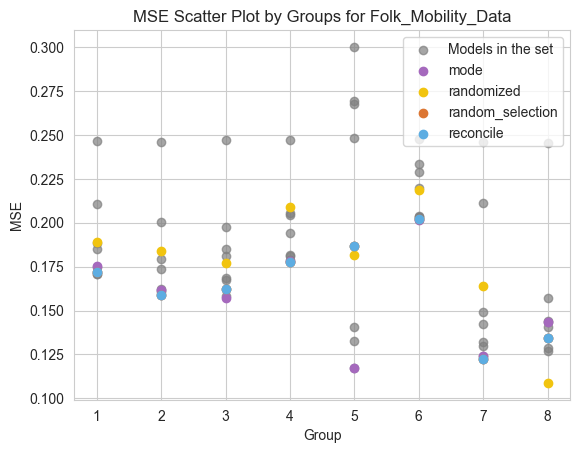

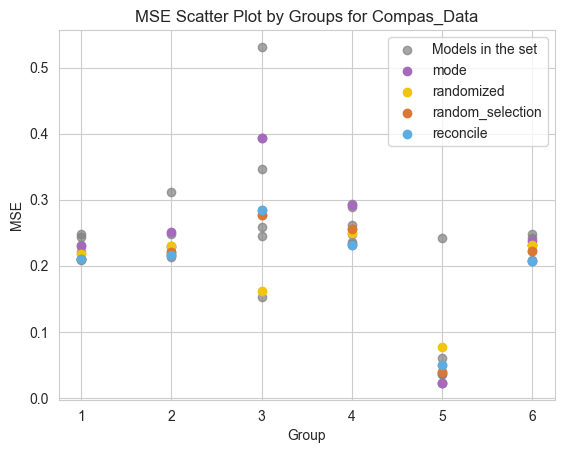

In [24]:
method_colors = {
    'mode': '#a569bd',
    'mean': '#a569bd',
    'randomized':'#f1c40f',
    'random_selection':'#dc7633',
    'reconcile': '#5dade2'
}
# filtered = data[(data['Data'] == dataset) & (data['Method']== 'original')]
# for mothod in filtered['Method'].unique():
#     model_data = first_experiment_df[first_experiment_df['Model'] == model]
for dataset in first_experiment_df['Data'].unique():
    filtered = first_experiment_df[first_experiment_df['Data'] == dataset]
    
    # Iterate over methods
    for method in filtered['Method'].unique():
        filtered_2 = filtered[filtered['Method'] == method]
        
        if method == 'original':
            # Handle 'original' method where outer list is models, inner list is group performance
            for mse_list in filtered_2['MSE for different groups']:
                for model_index, group_mse_values in enumerate(mse_list):
                    plt.scatter(
                        range(1, len(group_mse_values) + 1),  # X-axis: Group indices
                        group_mse_values,                    # Y-axis: MSE values for each group
                        color='gray',                        # Assign color to points
                        alpha=0.7,                           # Set opacity
                        label='Models in the set' if model_index==0 else None
                    )
        else:
            # Handle other methods with a single list
            mse_values = filtered_2['MSE for different groups'].iloc[0]  # Get the single list
            plt.scatter(
                range(1, len(mse_values) + 1),                 # X-axis: Group index
                mse_values,                                    # Y-axis: MSE values
                color=method_colors.get(method, 'gray'),       # Assign color based on method
                alpha=1,                                     # Set opacity
                label=f'{method}'                              # Label the method
            )
            max_x = filtered_2['MSE for different groups'].apply(lambda x: len(x)).max()
            plt.xticks(range(1, max_x + 1))
    
    # Customize and show the plot
    plt.title(f'MSE Scatter Plot by Groups for {dataset}')
    plt.xlabel('Group')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

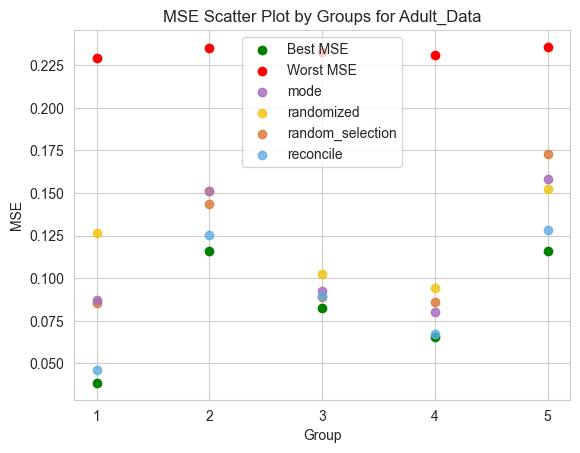

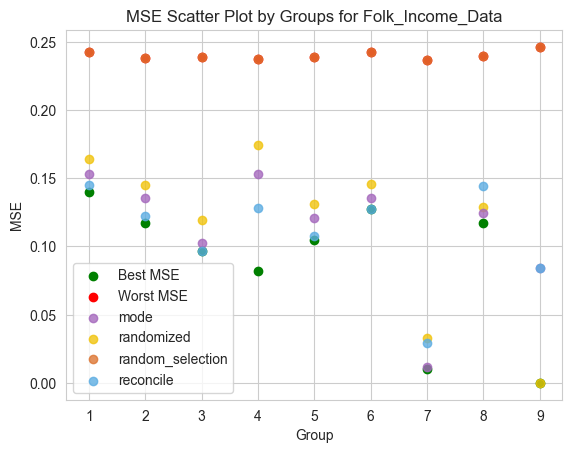

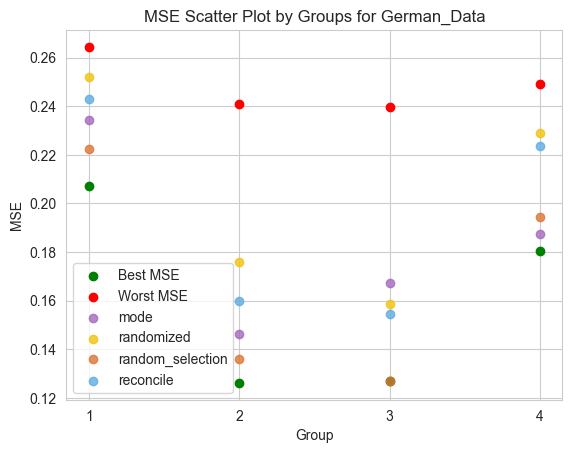

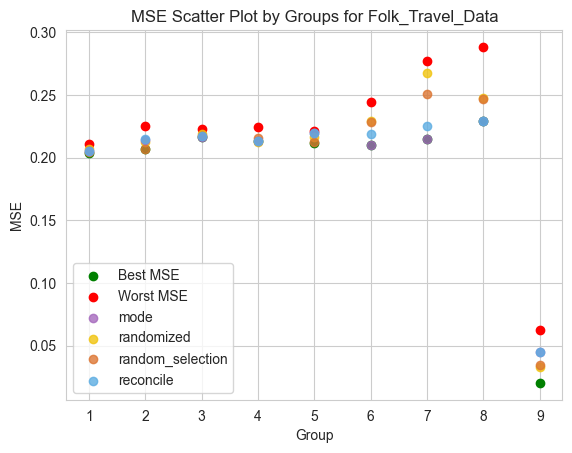

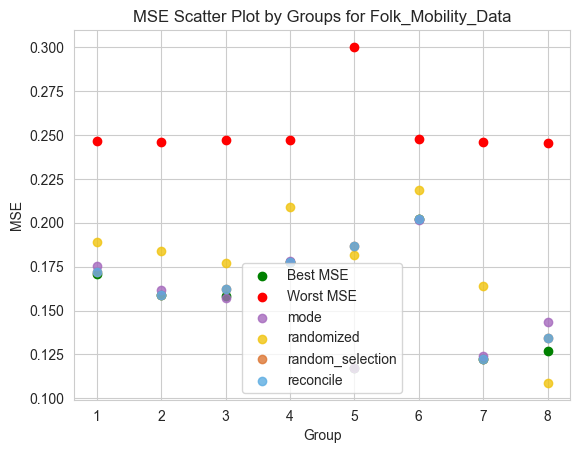

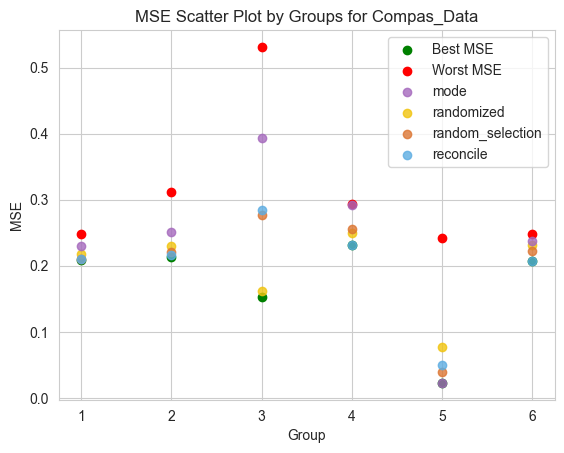

In [26]:
method_colors = {
    'mode': '#a569bd',
    'mean': '#a569bd',
    'randomized': '#f1c40f',
    'random_selection': '#dc7633',
    'reconcile': '#5dade2'
}
method_zorders = {
    'mode': 5,
    'mean': 5,
    'randomized': 3,
    'random_selection': 3,
    'reconcile': 5}

# Iterate over datasets
for dataset in first_experiment_df['Data'].unique():
    filtered = first_experiment_df[first_experiment_df['Data'] == dataset]
    
    # Iterate over methods
    for method in filtered['Method'].unique():
        filtered_2 = filtered[filtered['Method'] == method]
        
        if method == 'original':
            # Handle 'original' method: compute best and worst MSE for each group
            for mse_list in filtered_2['MSE for different groups']:
                # Transpose list of lists to get all models' MSEs for each group
                group_mse_values = zip(*mse_list)  # [(group1), (group2), ...]
                for group_index, group_values in enumerate(group_mse_values):
                    best_mse = min(group_values)  # Best (min) MSE for the group
                    worst_mse = max(group_values)  # Worst (max) MSE for the group
                    plt.scatter(
                        [group_index + 1],  # X-axis: Group index
                        [best_mse],         # Y-axis: Best MSE
                        color='green',      # Green for best
                        label='Best MSE' if group_index == 0 else None,
                        zorder=1
                    )
                    plt.scatter(
                        [group_index + 1],  # X-axis: Group index
                        [worst_mse],        # Y-axis: Worst MSE
                        color='red',        # Red for worst
                        label='Worst MSE' if group_index == 0 else None,
                        zorder=1
                    )
        else:
            # Handle other methods with a single list of MSE values
            mse_values = filtered_2['MSE for different groups'].iloc[0]  # Get the single list
            plt.scatter(
                range(1, len(mse_values) + 1),                 # X-axis: Group index
                mse_values,                                    # Y-axis: MSE values
                color=method_colors.get(method, 'gray'),       # Assign color based on method
                alpha=0.8,                                     # Set opacity
                label=f'{method}'  ,
                zorder =method_zorders.get(method, 0) # Label the method
            )
    
    # Customize the plot
    plt.title(f'MSE Scatter Plot by Groups for {dataset}')
    plt.xlabel('Group')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    
    # Set X-axis to include only integers
    max_x = filtered_2['MSE for different groups'].apply(lambda x: len(x)).max()
    plt.xticks(range(1, max_x + 1))  # X-axis ticks from 1 to the maximum group index
    
    # Show the plot
    plt.show()

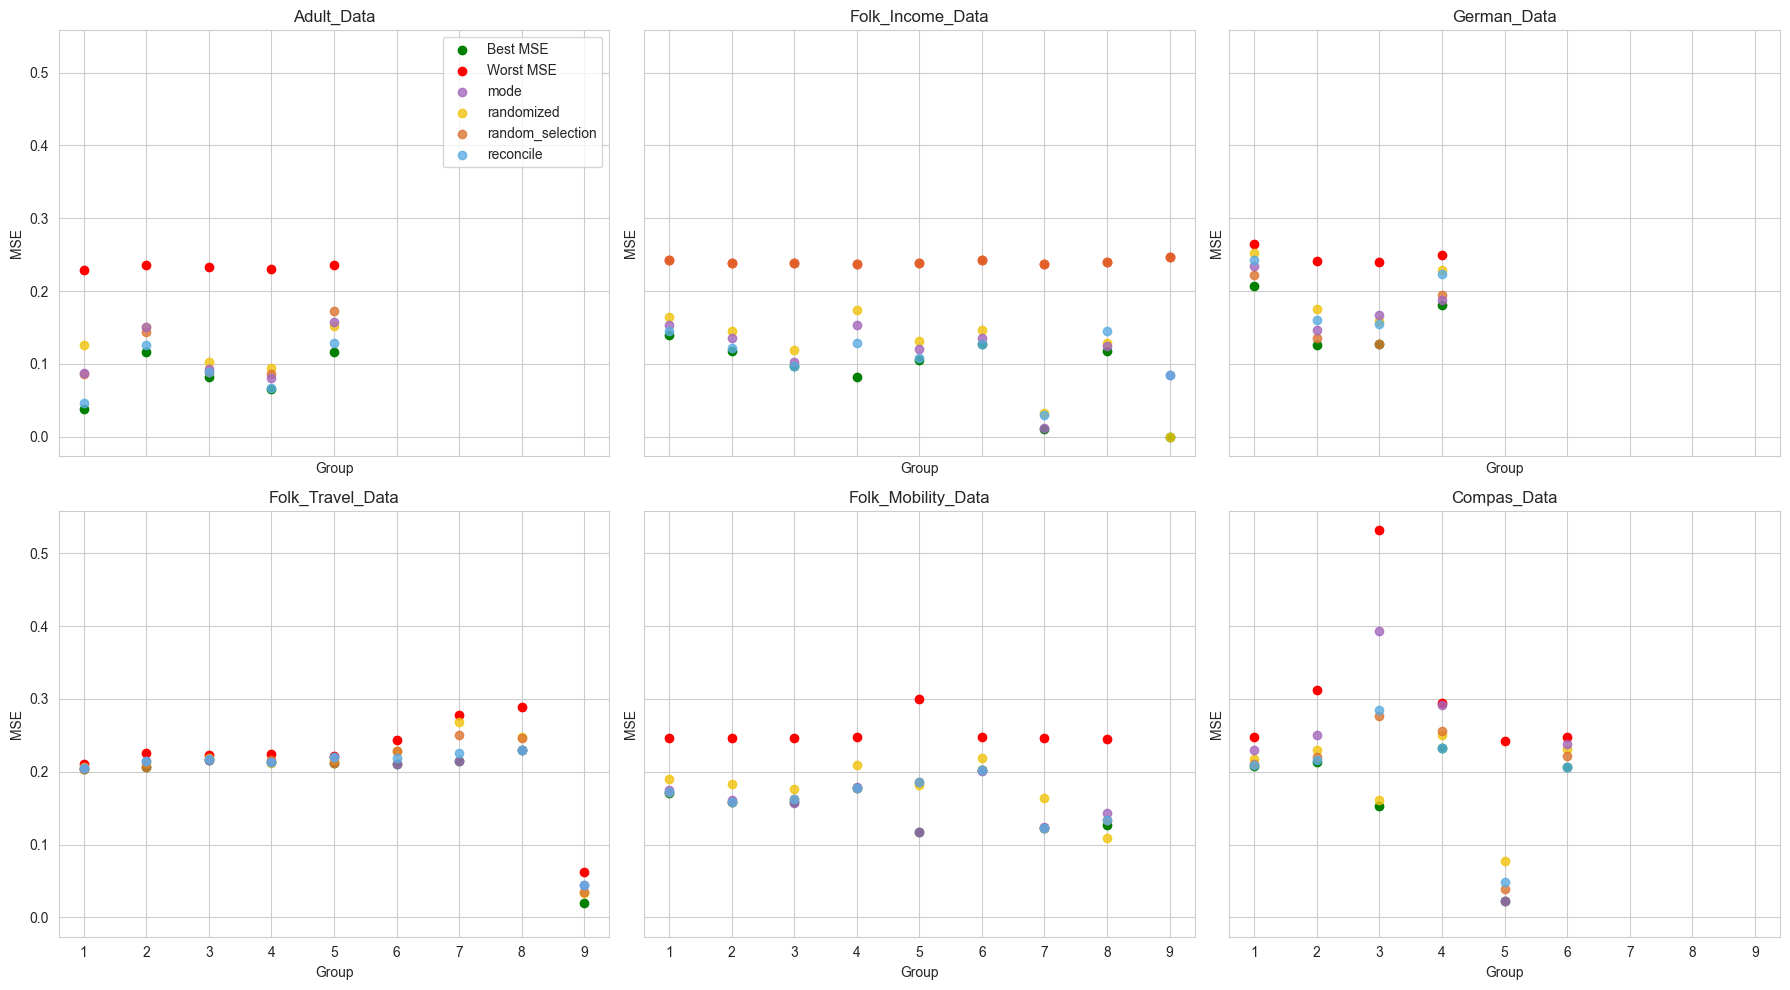

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration
method_zorders = {
    'mode': 5,
    'mean': 5,
    'randomized': 3,
    'random_selection': 3,
    'reconcile': 5}
datasets = data['Data'].unique()
# Iterate over datasets and plot in subplots
for i, dataset in enumerate(datasets):
    ax = axes[i]
    filtered = first_experiment_df[first_experiment_df['Data'] == dataset]
    
    # Iterate over methods
    for method in filtered['Method'].unique():
        filtered_2 = filtered[filtered['Method'] == method]
        
        if method == 'original':
            # Handle 'original' method: compute best and worst MSE for each group
            for mse_list in filtered_2['MSE for different groups']:
                # Transpose list of lists to get all models' MSEs for each group
                group_mse_values = zip(*mse_list)  # [(group1), (group2), ...]
                for group_index, group_values in enumerate(group_mse_values):
                    best_mse = min(group_values)  # Best (min) MSE for the group
                    worst_mse = max(group_values)  # Worst (max) MSE for the group
                    ax.scatter(
                        [group_index + 1],  # X-axis: Group index
                        [best_mse],         # Y-axis: Best MSE
                        color='green',      # Green for best
                        label='Best MSE' if group_index == 0 else None,
                        zorder=1
                    )
                    ax.scatter(
                        [group_index + 1],  # X-axis: Group index
                        [worst_mse],        # Y-axis: Worst MSE
                        color='red',        # Red for worst
                        label='Worst MSE' if group_index == 0 else None,
                        zorder=1
                    )
        else:
            # Handle other methods with a single list of MSE values
            mse_values = filtered_2['MSE for different groups'].iloc[0]  # Get the single list
            ax.scatter(
                range(1, len(mse_values) + 1),                 # X-axis: Group index
                mse_values,                                    # Y-axis: MSE values
                color=method_colors.get(method, 'gray'),       # Assign color based on method
                alpha=0.8,                                     # Set opacity
                label=f'{method}'  ,
                zorder =method_zorders.get(method, 0) # Label the method
            )
    
    # Customize each subplot
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Group')
    ax.set_ylabel('MSE')
    ax.grid(True)
    if i == 0:  # Add legend to the first subplot only
        ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [2]:
df = pd.read_csv("../results/experiment1_fairness_different_models.csv")
df['Experiment'] = (
    df.groupby(['Data', 'Method']).cumcount() + 1
) 
df['MSE'] = df['MSE'].apply(ast.literal_eval)

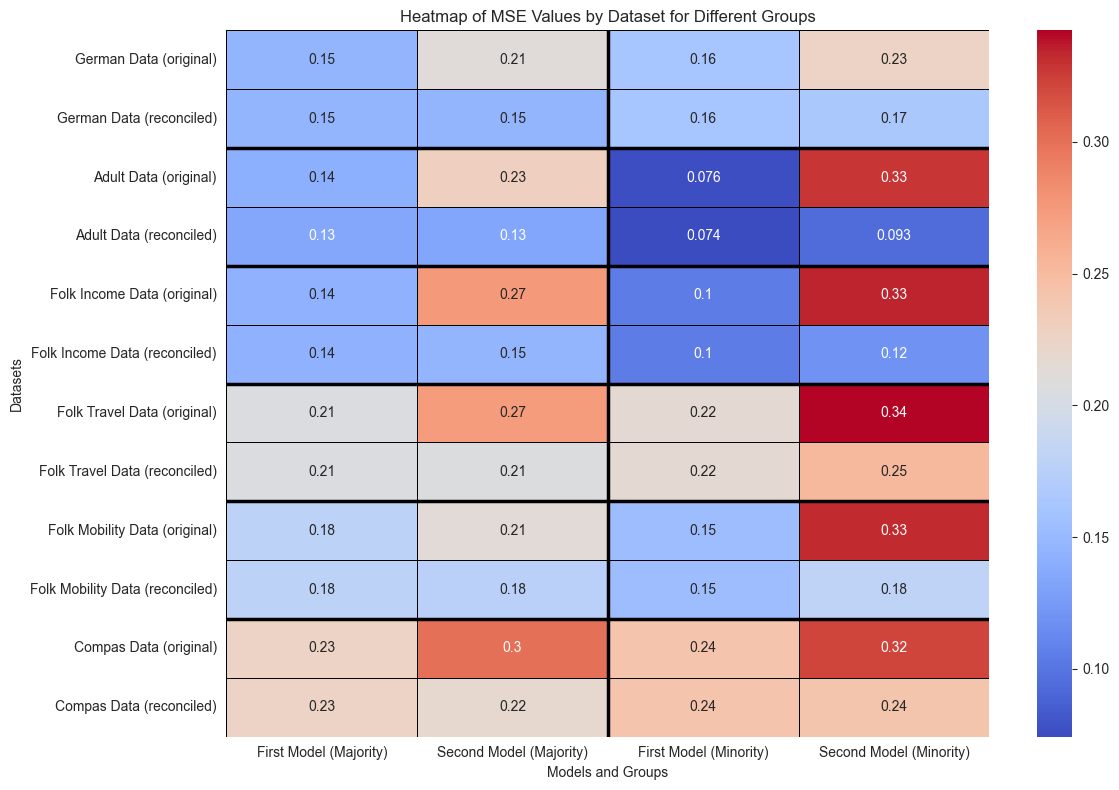

In [3]:
filtered_df = df[df['Experiment'] == 1]

# Step 2: Extract MSE values and prepare heatmap data
heatmap_data = []
heatmap_index = []

for _, row in filtered_df.iterrows():
    dataset = row['Data']
    method = row['Method']
    mse_values = row['MSE']  # Extract the MSE list directly

    # Prepare the row for heatmap
    heatmap_row = [
        mse_values[0][0],  # First model (Majority)
        mse_values[1][0],  # Second model (Majority)
        mse_values[0][1],  # First model (Minority)
        mse_values[1][1],  # Second model (Minority)
    ]

    heatmap_data.append(heatmap_row)
    heatmap_index.append(f'{dataset.replace("_"," ")} ({str.lower(method)})')

# Step 3: Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(
    heatmap_data,
    columns=['First Model (Majority)', 'Second Model (Majority)',
             'First Model (Minority)', 'Second Model (Minority)'],
    index=heatmap_index
)

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    heatmap_df,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
num_datasets = len(filtered_df['Data'].unique())
rows_per_dataset = 2  # Original and Reconciled
for i in range(rows_per_dataset, heatmap_df.shape[0], rows_per_dataset):
    ax.hlines(i, *ax.get_xlim(), colors='black', linewidth=2.5)

# Add a thicker vertical line in the middle
num_columns = heatmap_df.shape[1]
middle_column = num_columns // 2
ax.vlines(middle_column, *ax.get_ylim(), colors='black', linewidth=2.5)
plt.title('Heatmap of MSE Values by Dataset for Different Groups')
plt.xlabel('Models and Groups')
plt.ylabel('Datasets')
plt.tight_layout()
plt.show()